<h1><div class="alert alert-block alert-warning">
Simulated Annealing
</div></h1>

<h2>Dual Annealing</h2>

In [111]:
from scipy import optimize

lw = [-5,-5,-5,-5,-5]
up = [10,10,10,10,10]

def f(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (x[:-1]-1)**2.0)

res = optimize.dual_annealing(f, bounds=list(zip(lw, up)))

print("global minimum: xmin = {0}, f(xmin) = {1:.6f}".format(res.x, res.fun))

global minimum: xmin = [0.99999953 0.999999   0.99999802 0.99999594 0.99999182], f(xmin) = 0.000000


Using the package that the teacher 

https://github.com/perrygeo/simanneal

<h1><font color = "blue">Simulated annealing from scratch</font></h1>

1) Choose a random Xi, select the initial system temperature, and specify the cooling (i.e. annealing) schedule <br>
2) Evaluate E(Xi) using a simulation model <br>
3) Perturb Xi to obtain a neighboring Design Vector (Xi+1) <br>
4) Evaluate E(Xi+1) using a simulation model <br>
5) If E(Xi+1)< E(Xi), Xi+1 is the new current solution <br>
6) If E(Xi+1)> E(Xi), then accept Xi+1 as the new current solution with a probability e(- /T) where = E(Xi+1) - E(Xi). <br>
7) Reduce the system temperature according to the cooling schedule. <br>
8) Terminate the algorithm.

The perturbation in simulated annealing would be around $10^{-4}$ and $10^{-2}$

best fit of the algorithm: [0.97365603 0.99705171 1.00061448 1.00332441 0.96756462]
cost function at best fit : 0.3987724814039987


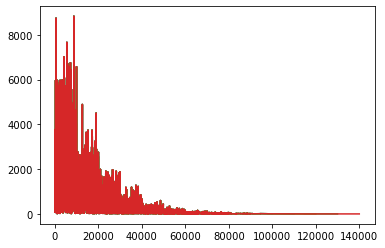

In [113]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

interval = (-5, 10)

def f(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (x[:-1]-1)**2.0)

def move_(fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * random.random()
    return delta

def simulated_annealing(max_it,init_temp, alpha, final_temp, initial_state, debug=False):
    perturbation = np.zeros(len(initial_state))
    #The initial configuration
    current_state = initial_state
    #The energy at the initial configuration 
    costs = [f(current_state)]
    iterations = [1]
    t = init_temp
    while (t > final_temp):
        for i in range(1, max_it):
            #Perturb the configuration and evaluate the difference in terms of energy
            for j in range(0, len(initial_state)):
                perturbation[j] = move_()
            next_state = current_state + perturbation
            energy_delta = f(next_state) - f(current_state)
            if (debug == True):
                print("Step #: " + str(i) + ", Temp = " +str(t)+ " Energy = "+ str(f(current_state)) + " New Energy = " + str(f(next_state))+" delta = " + str(energy_delta))
            if ((energy_delta < 0) or (math.exp(-energy_delta/t))>= random.random()):
                #accept the new configuration
                current_state = next_state
            costs.append(f(current_state))
            iterations.append(len(iterations))
        t = alpha*t
        plt.plot(iterations,costs)
    return current_state 

initial_config = np.random.rand(5)
res = simulated_annealing(max_it=10000,init_temp=1000,alpha=.5,final_temp=.1,initial_state=initial_config)
print ("best fit of the algorithm:", res)
print ("cost function at best fit :", f(res))
